# Import packages

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random

# Generate data

In [41]:
mu, sigma = 0, 1 # mean and standard deviation
N = 10000

### Generate z_vec

Generate vector z of hidden states as follows:

$$z_{i} = \gamma z_{i-1} + \delta_i \hspace{0.5cm} \text{with } z_0 = 0, \hspace{0.2cm} \gamma = 0.5, \hspace{0.2cm} \delta = norm(0, 1)$$


In [42]:
z0 = 0
gamma = 0.5
delta = np.random.normal(mu, sigma, N)
z_vec = []
z_vec.append(gamma*z0 + delta[0])
for i in range(1, N):
    z_vec.append(gamma*z_vec[i-1] + delta[i])  

# convert to np array
z_vec = np.array(z_vec)

### Generate x_vec

Generate vector x of observations as follows:

$$x_{i} = norm(z_{i},1) \hspace{0.5cm}$$

In [43]:
x_vec = []
for i in range(N):
    x_i = np.random.normal(z_vec[i], sigma)
    x_vec.append(x_i)

# convert to np array
x_vec = np.array(x_vec)

# Find z_vec given parameters $\alpha, \beta, \gamma, \delta$

if $\alpha=1, \beta=0, \text{and } \gamma=0.5, \delta=0$, we expect to get the vector z that is approximately equal to our hidden vector z. The problem is as follows:

$$z_i = \text{argmin } [x_i - (\alpha z_i + \beta)]^2 + [z_i - (\gamma z_{i-1} + \delta)]^2 = \text{argmin } (x_i - z_i)^2 + (z_i - 0.5 z_{i-1})^2$$

This means that our solution should satisfy:
$$4z_i - z_{i-1} = 2x_i \Leftrightarrow z_i = \frac{2x_i + z_{i-1}}{4}$$

In [44]:
z = []
z.append(2*x_vec[0]/4)
for i in range(1, N):
    z_i = (2*x_vec[i] + z[i-1])/4
    z.append(z_i)
    
# convert to np array    
z = np.array(z)

### plot z and hidden z_vec

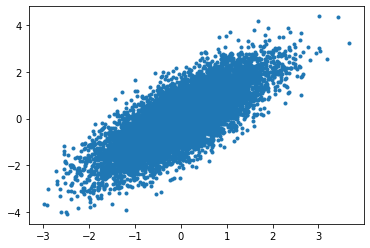

In [45]:
plt.plot(z, z_vec, '.')

Use linear regression to estimate the found z and hidden z_vec
$$z{\text{_vec}} = az + b$$

In [46]:
Z = []
for i in range(N):
    params = [z[i], 1]
    Z.append(params)
Z = np.matrix(Z, dtype='float')
ZZ = np.matmul(Z.transpose(),Z)
ZZ = np.linalg.inv(ZZ)
ZZ_vec = np.matmul(Z.transpose(), z_vec).transpose()
ab = ZZ*ZZ_vec

In [47]:
print(ab)

[[ 1.04235294]
 [-0.003123  ]]


In [48]:
a = ab.item(0)
b = ab.item(1)

In [49]:
z_hat = []
for i in range(N):
    z_hat.append(a*z[i] + b)

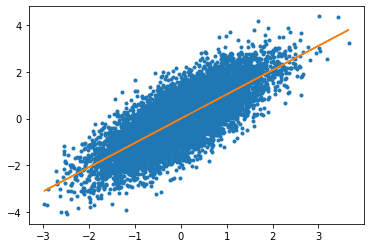

In [50]:
plt.plot(z, z_vec, '.')
plt.plot(z, z_hat)

# Find z_vec NOT given parameters $\alpha, \beta, \gamma, \delta$

$$\textbf{Var} = [x_i - (\alpha z_i + \beta)]^2 + [z_i - (\gamma z_{i-1} + \delta)]^2 = (x_i - z_i)^2 + (z_i - \gamma z_{i-1})^2 \hspace{0.2cm} \forall i = 1, 2, ..., m$$

Iterate 2 steps until convergence:

**Step 1:** Given x, $z_0$ = 0 and $\gamma$, we adjust z to minimize the variance. The solution should satisfy:
$$4z_i - 2*\gamma*z_{i-1} = 2x_i \Leftrightarrow z_i = \frac{2x_i + 2*\gamma*z_{i-1}}{4}$$
**Step 2:** Given x, z, using the poor man procedure, we adjust $\gamma$ to minimize the variance:
$$z_i = \gamma z_{i+1}$$


In [51]:
threshold = 1/N
gamma = random.randrange(0,1)
iteration = 0
while True:
    # step 1
    if iteration > 0:
        z_prev = z
    z = []
    z.append(2*x_vec[0]/4)
    for i in range(1, N):
        z_i = (2*x_vec[i] + 2*gamma*z[i-1])/4
        z.append(z_i)
    
    z = np.array(z, dtype='float')
    if iteration > 0:
        error = np.sum((z - z_prev)**2)/N
        if error < threshold:
            break
    
    # step 2
    Z = []
    Z.append(z0)
    for i in range(N-1):
        Z.append(z[i])
    Z = np.matrix(Z, dtype='float')
    ZZ = np.matmul(Z, Z.transpose())
    ZZ = np.linalg.pinv(ZZ)
    ZZ_vec = np.matmul(Z, z.transpose())
    gamma_vec = ZZ*ZZ_vec
    gamma = gamma_vec.item(0)
    print(gamma)
    
    iteration += 1
    

0.28209714286268506
0.4143877417714517
0.4727513725142662
0.4977732003237795
0.5083658975294396
0.5128259501813237
0.5146995492812294
0.515485858997347
0.5158157225222681
0.5159540794629293


In [52]:
print(gamma)

0.5159540794629293
